In [1]:
import cv2

In [2]:
import time

In [3]:
import pyautogui

In [4]:
import numpy as np

In [10]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

# Utility functions

In [35]:
def take_screen_shot(region=None):
    """
    region: four-integer tuple of the left, top,
    width, and height of the region to capture
    """
    
    print('Waiting 5 seconds before screen shot')
    print('Please change the browser window to semantris blocks mode')
    time.sleep(5)
    
    return pyautogui.screenshot(region=region)

In [25]:
FIGSIZE = (6,6)
def plot_img(arr, fs=FIGSIZE, cmap='gray', title=None):
    plt.figure(figsize=fs)
    plt.imshow(arr, cmap=cmap)
    plt.title(title)
    plt.show()

In [76]:
def bgr_to_hsv_value(color):
    """
    Convert a list of BGR color to HSV list
    """
    
    c = np.uint8([[color]])
    hsv = cv2.cvtColor(c, cv2.COLOR_BGR2HSV)
    
    return hsv[0][0]

In [88]:
bgr_to_hsv_value([190, 60, 135])

array([137, 174, 190], dtype=uint8)

In [70]:
"""
Improvised from the following stackoverflow answer
https://stackoverflow.com/a/48738145/2947248
"""

import cv2
import numpy as np
from IPython.display import clear_output, Image, display
from io import StringIO, BytesIO
import PIL.Image

def showarray(a, fmt='png'):
    a = np.uint8(np.clip(a, 0, 255))
    f = BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

# Screen Processing

Waiting 5 seconds before screen shot
Please change the browser window to semantris blocks mode


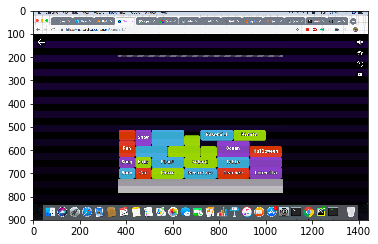

In [34]:
screen = take_screen_shot()
plot_img(screen)

### Crop screen shot

Waiting 5 seconds before screen shot
Please change the browser window to semantris blocks mode


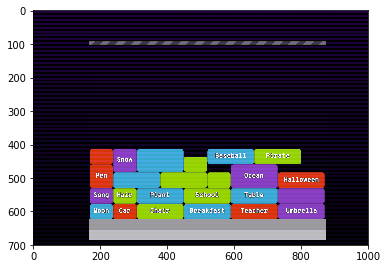

In [46]:
# region: four-integer tuple of the left, top
# width, and height of the region to capture
# for my system the screen is 1440 x 900
screen = take_screen_shot(region=(200, 100, 1000, 700))
plot_img(screen)

### Color tracking

In [101]:
frame = np.array(screen)

# Convert RGB to HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)

# define range of blue color in HSV
lower_blue = np.array([90,50,50])
upper_blue = np.array([110,255,255])
# threshold the HSV image to get only blue colors
mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

"""
# define range of purple color in HSV
lower_purple = np.array([127,50,50])
upper_purple = np.array([147,255,255])
# threshold the HSV image to get only purple colors
mask_purple = cv2.inRange(hsv, lower_purple, upper_purple)
"""

"""
To track multiple colors, you can bitwise-OR
two images with different colors

res = cv2.bitwise_or(res_blue, res_purple)
"""

# Bitwise-AND mask and original images
res_blue = cv2.bitwise_and(frame, frame, mask= mask_blue)
# res_purple = cv2.bitwise_and(frame, frame, mask= mask_purple)

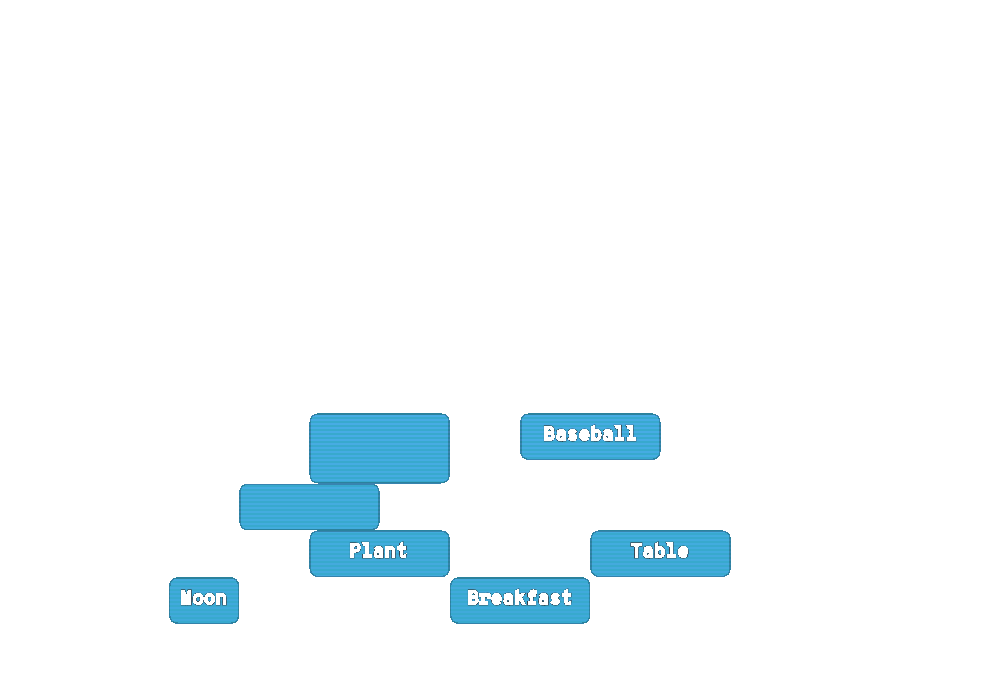

In [122]:
showarray(res_blue)

### Contour detection

In [123]:
imgray = cv2.cvtColor(res_blue, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

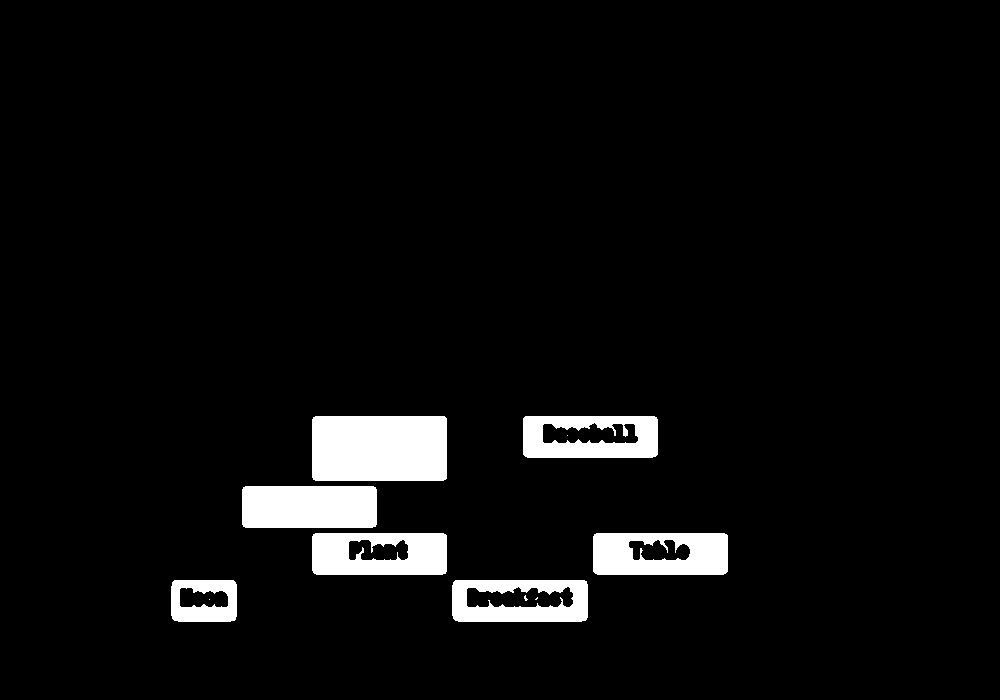

In [124]:
showarray(cv2.drawContours(im2, contours, -1, (0,0,0)))